# Prep files and libraries
* Import standard Numpy and Pandas libraries for analysis
* Bring in the census data from file and put in in a pandas dataframe
* Get rid of the geom column. It contains a lot of geographic data that we will not be using 
* Data was pulled from the [Baltimore City Public Data website](https://data.baltimorecity.gov/Neighborhoods/2010-Census-Neighborhoods/r3qj-2ifh)

In [240]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb



raw_data = pd.read_csv('2010_Census_Profile_by_Census_Tracts.csv')
del raw_data['the_geom']

#45 different catagories over 200 census blocks
print(raw_data.shape)

(200, 45)


# What are the columns that I have?
- We want to take a look at all the different columns we have, so we know what we are working with
-

In [241]:
print(raw_data.columns)
raw_data[:5]

Index(['NAME', 'Population', 'White', 'Blk_AfAm', 'AmInd_AkNa', 'Asian',
       'NatHaw_Pac', 'Other_Race', 'TwoOrMore', 'Hisp_Lat', 'PopOver18',
       'Ovr18White', 'Ovr18Blk_A', 'Ovr18AmInd', 'Ovr18Asian', 'Ovr18Haw_P',
       'Ovr18Other', 'Ovr18TwoOr', 'Ovr18HispL', 'Male', 'Female', 'AGE0_4',
       'AGE5_11', 'AGE12_14', 'AGE15_17', 'AGE18_24', 'AGE25_34', 'AGE35_44',
       'AGE45_64', 'AGE65ovr', 'Families', 'Married', 'Married18', 'MaleHH',
       'MaleHH18', 'FemaleHH', 'FemaleHH18', 'Housing', 'Occupied', 'Occ_Own',
       'Occ_Rent', 'Vacant', 'Vac_Rent', 'Vac_Sale', 'Vac_Other'],
      dtype='object')


,NAME,Population,White,Blk_AfAm,AmInd_AkNa,Asian,NatHaw_Pac,Other_Race,TwoOrMore,Hisp_Lat,...,FemaleHH,FemaleHH18,Housing,Occupied,Occ_Own,Occ_Rent,Vacant,Vac_Rent,Vac_Sale,Vac_Other
0,Census Tract 1510,5214,94,5029,19,14,0,8,50,41,...,635,262,2339,1822,892,930,517,152,27,338
1,Census Tract 807,1137,22,1086,0,5,0,9,15,22,...,153,72,726,382,176,206,344,22,19,303
2,Census Tract 805,1704,12,1661,6,6,0,2,17,11,...,230,80,735,543,282,261,192,52,19,121
3,Census Tract 1505,1543,14,1486,3,2,0,10,28,6,...,211,85,757,679,281,398,78,21,6,51
4,Census Tract 2703.02,1764,759,914,4,27,0,17,43,40,...,127,61,786,707,500,207,79,31,8,40


# What is the population distribution look like?
Neighborhoods are broken up per hundred people, so the first bar represents 0-100 people, the second 100-200, and so on

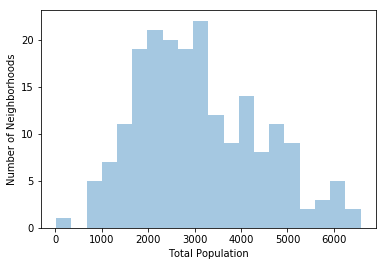

In [242]:
sb.distplot(raw_data['Population'], kde = False, bins = 20)
plt.ylabel("Number of Neighborhoods")
plt.xlabel('Total Population')
plt.show()

### What about neighborhood distributions based on racial make up?

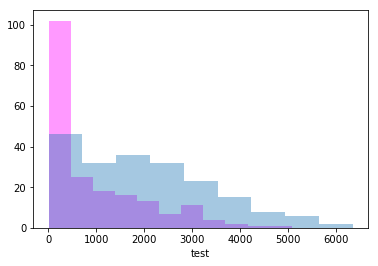

In [243]:
sb.distplot(raw_data['White'], kde = False, axlabel = "test", color = "#ff00ff")
sb.distplot(raw_data['Blk_AfAm'], kde = False, axlabel = "test")

### This gives us some interesting insights on basic baltimore Makups
* Over 100 census districts in Baltimore contain fewer than 500 white citizens
* Black Neighborhods are a little more distibuted in terms of size. 

In [244]:
lauraville = raw_data[raw_data['NAME'] == 'Census Tract 2702']
lauraville

,NAME,Population,White,Blk_AfAm,AmInd_AkNa,Asian,NatHaw_Pac,Other_Race,TwoOrMore,Hisp_Lat,...,FemaleHH,FemaleHH18,Housing,Occupied,Occ_Own,Occ_Rent,Vacant,Vac_Rent,Vac_Sale,Vac_Other
90,Census Tract 2702,1914,1017,785,13,19,0,23,57,63,...,135,68,817,748,545,203,69,19,15,35


In [245]:
white_pop = raw_data['White'].copy().sort_values()
#print(white_pop)
print("Total white population of Baltimore (200 Census Districts): %d" % np.sum(white_pop))
print("Total white population in top 20 census districts: %d" % np.sum(white_pop[-20 : -1]))
print("Total white population in bottom 100 census districts: %d" % np.sum(white_pop[1 : 100]))
print('\n')


black_pop = raw_data['Blk_AfAm'].copy().sort_values()
print("Total black population of Baltimore (200 Census Districts): %d" % np.sum(black_pop))
print("Total black population in top 20 census districts: %d" % np.sum(black_pop[-20 : -1]))
print("Total black population in bottom 100 census districts: %d" % np.sum(black_pop[1 : 100]))

Total white population of Baltimore (200 Census Districts): 183830
Total white population in top 20 census districts: 61299
Total white population in bottom 100 census districts: 11093


Total black population of Baltimore (200 Census Districts): 395781
Total black population in top 20 census districts: 89757
Total black population in bottom 100 census districts: 82052


In [246]:
import matplotlib.pyplot as plt

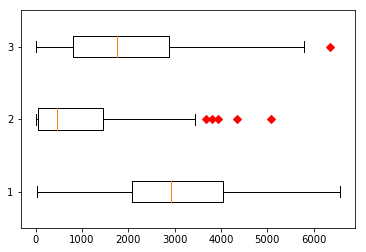

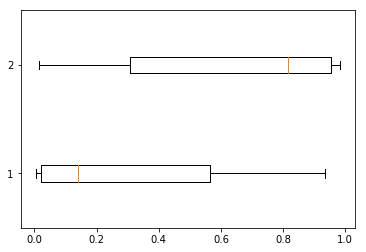

White Population Percent Median and Standard Deviation: 0.141840497175, 0.3080005930554685
Black Population Percent Median and Standard Deviation: 0.816532009549, 0.34623771993746677
Total Population Standard Deviation: 1320.7887669778995


In [247]:
plt.boxplot([raw_data['Population'], raw_data['White'], raw_data['Blk_AfAm'] ], 0, 'rD', 0)
plt.figure()
#plt.boxplot(raw_data['White'], 0, '', 0)
plt.figure()
w_percent = raw_data['White'] / raw_data['Population']
b_percent = raw_data['Blk_AfAm']/ raw_data['Population']
plt.boxplot([w_percent, b_percent], 0, 'rs', 0)
plt.figure()
plt.show()
print('White Population Percent Median and Standard Deviation: ' + str(np.median(w_percent)) + ', ' + str(np.std(w_percent)))
print('Black Population Percent Median and Standard Deviation: ' + str(np.median(b_percent)) + ', ' + str(np.std(b_percent)))
print("Total Population Standard Deviation: " + str(np.std(raw_data['Population'])))

In [248]:
print(np.sum(raw_data['White']))

183830


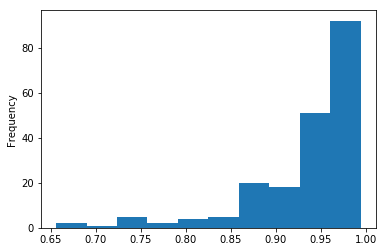

In [249]:
bw_percent = (raw_data['Blk_AfAm'] + raw_data['White'])/ raw_data['Population']
bw_percent.plot.hist()
plt.show()

In [250]:
print("Neighborhoods where black and white people make up more than 90% of pop: ", bw_percent[bw_percent >.90].count())
print(bw_percent[bw_percent <.50].count())
print("Neighborhoods where white people make up more than 90% of pop: ", w_percent[w_percent >.90].count())
print("Neighborhoods where white people make up fewer than 29% of pop: ",w_percent[w_percent <.29].count())
print(w_percent.median())
print(np.sum(raw_data['White']) / np.sum(raw_data['Population']))
print("Neighborhoods where black people make up more than 90% of pop: ", b_percent[b_percent >.90].count())
print(b_percent[b_percent <.50].count())
print(b_percent.median())
print(np.sum(raw_data['Blk_AfAm']) / np.sum(raw_data['Population']))

Neighborhoods where black and white people make up more than 90% of pop:  159
0
Neighborhoods where white people make up more than 90% of pop:  5
Neighborhoods where white people make up fewer than 29% of pop:  117
0.14184049717510253
0.2960411362388298
Neighborhoods where black people make up more than 90% of pop:  77
68
0.8165320095490634
0.6373685303907974


In [251]:

print(raw_data[(raw_data["White"] + raw_data['Blk_AfAm']) / raw_data['Population'] < .85][['NAME', 'Population', 'Asian', 'Hisp_Lat']])


                     NAME  Population  Asian  Hisp_Lat
5       Census Tract 1201        4790    860       167
13      Census Tract 1101        3223    349       155
17      Census Tract 1207        2476    219       113
19       Census Tract 601        3222     61       818
55      Census Tract 2610        3253     43       944
88       Census Tract 401        4006    835       225
99      Census Tract 2506          22      0         5
108      Census Tract 202        2087    133       700
118      Census Tract 402         838    169        21
122     Census Tract 2608        2647     51      1006
137  Census Tract 2606.05        4795    105      1003
140  Census Tract 2604.01        3230     14       816
149  Census Tract 2604.04        1996     78       737
160  Census Tract 2605.01        4875    173      1220
176  Census Tract 1202.02        6224   1709       345
177  Census Tract 2720.07        4367    150       623
199     Census Tract 2607        2260     31       814


In [255]:

percentage = 100 * raw_data[['Blk_AfAm', 'White', 'Asian', 'Hisp_Lat']].copy().div(raw_data['Population'],  axis = 0)
percentage['NAME'] = raw_data['NAME']
percentage.rename(columns = {'Blk_AfAm' : 'Black', 'Hisp_Lat' : 'Hispanic/Latino'}, inplace = True)


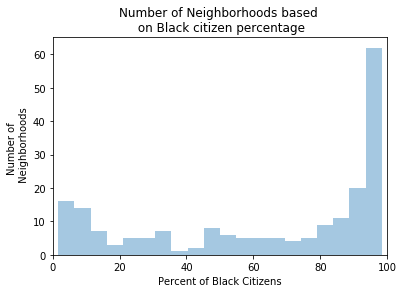

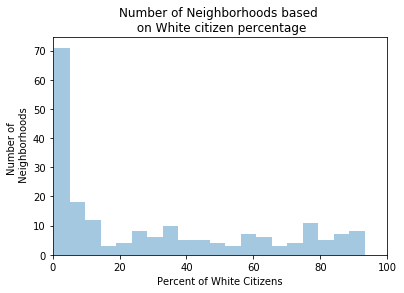

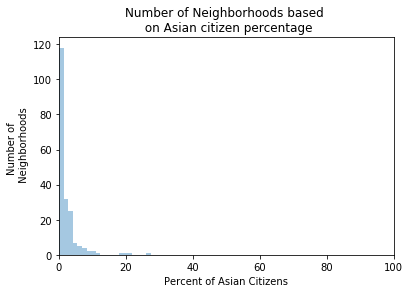

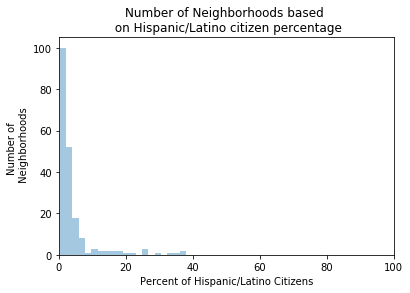

In [253]:
for col in percentage:
    if col == 'NAME':
        break
    sb.distplot(percentage[col], kde = False, bins = 20)
    plt.title('Number of Neighborhoods based \n on ' + col + " citizen percentage")
    plt.xlabel('Percent of ' + col + ' Citizens')
    plt.ylabel('Number of \n Neighborhoods')
    plt.xlim(0,100)
    plt.show()